In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import warnings
import os
warnings.filterwarnings('ignore')


Creating synthetic US accidents dataset for demonstration...
Synthetic dataset created with shape: (10000, 17)

Dataset preview:


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,State,Weather_Condition,Sunrise_Sunset,Temperature(F),Visibility(mi),Precipitation(in),Crossing,Junction,Stop,Traffic_Signal,Roundabout,Year,Month,Day,Hour,Weekday,Weekend,Duration_Minutes
0,A-1,1,2023-04-13 17:15:00,2023-04-13 19:03:39.205497,33.967380,-81.200101,GA,Clear,Night,74.495754,10.000000,0.094827,False,True,False,False,False,2023,4,13,17,Thursday,0,108.653425
1,A-2,1,2023-12-15 00:01:00,2023-12-15 03:50:39.000261,32.989890,-113.929280,PA,Clear,Day,63.563497,9.086068,0.044367,False,False,True,False,False,2023,12,15,0,Friday,0,229.650004
2,A-3,1,2023-09-28 13:45:00,2023-09-28 16:48:43.123667,29.227694,-104.201618,MD,Clear,Day,67.850163,6.217052,0.110791,False,True,False,False,False,2023,9,28,13,Thursday,0,183.718728
3,A-4,2,2023-04-17 00:25:00,2023-04-17 03:00:43.096901,39.574400,-85.203162,TX,Clear,Night,59.525244,8.707390,0.127221,True,True,False,True,False,2023,4,17,0,Monday,0,155.718282
4,A-5,1,2023-03-13 15:14:00,2023-03-13 16:16:45.834870,36.438980,-96.074639,OH,Clear,Day,38.152493,9.775135,0.135378,False,True,False,True,False,2023,3,13,15,Monday,0,62.763915



Dataset summary statistics:


,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Temperature(F),Visibility(mi),Precipitation(in),Year,Month,Day,Hour,Weekend,Duration_Minutes
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.749300,2023-07-01 10:16:32.988000,2023-07-01 12:30:19.398426624,37.108717,-94.996976,65.054634,8.227924,0.102648,2023.0,6.491800,15.686700,11.648700,0.290700,133.773507
min,1.000000,2023-01-01 00:05:00,2023-01-01 01:38:14.812396,25.003786,-124.997113,9.422750,0.000000,0.000004,2023.0,1.000000,1.000000,0.000000,0.000000,30.002443
25%,1.000000,2023-04-03 01:05:00,2023-04-03 03:25:06.982582272,31.094699,-109.775125,54.988780,6.977091,0.029326,2023.0,4.000000,8.000000,6.000000,0.000000,81.729062
50%,2.000000,2023-06-30 07:07:00,2023-06-30 09:44:24.567173632,37.141523,-94.875914,64.948640,8.992367,0.071359,2023.0,6.000000,16.000000,12.000000,0.000000,133.431010
75%,2.000000,2023-09-30 22:42:30,2023-10-01 00:55:14.336632576,43.155501,-80.319569,75.114742,10.000000,0.141970,2023.0,9.000000,23.000000,18.000000,1.000000,185.401333
max,4.000000,2023-12-30 23:34:00,2023-12-31 01:27:39.605698,48.998196,-65.005941,122.446733,10.000000,1.145323,2023.0,12.000000,31.000000,23.000000,1.000000,239.940711
std,0.830011,NaN,NaN,6.943069,17.206425,14.948094,2.081958,0.102875,0.0,3.437661,8.744678,6.899989,0.454108,60.402327



--- TIME PATTERN ANALYSIS ---


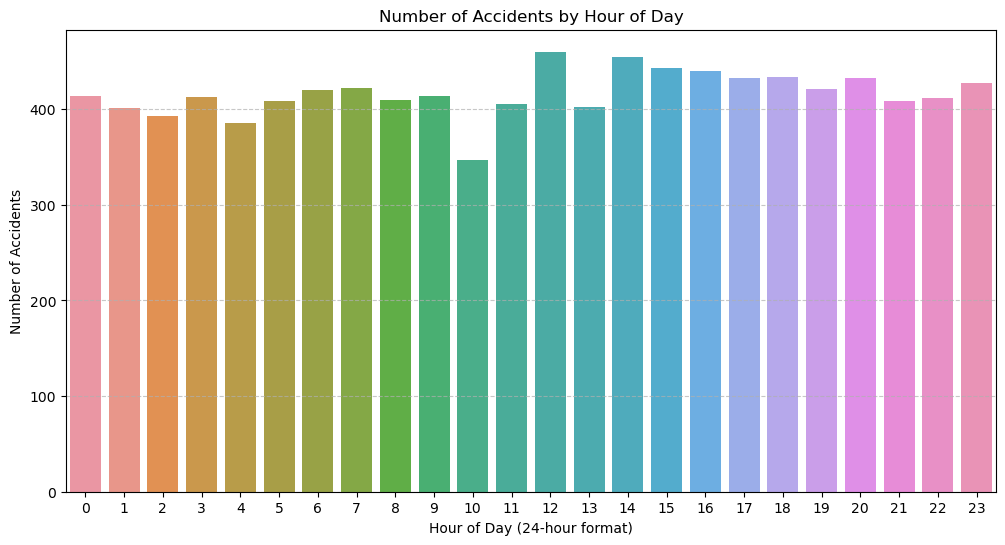

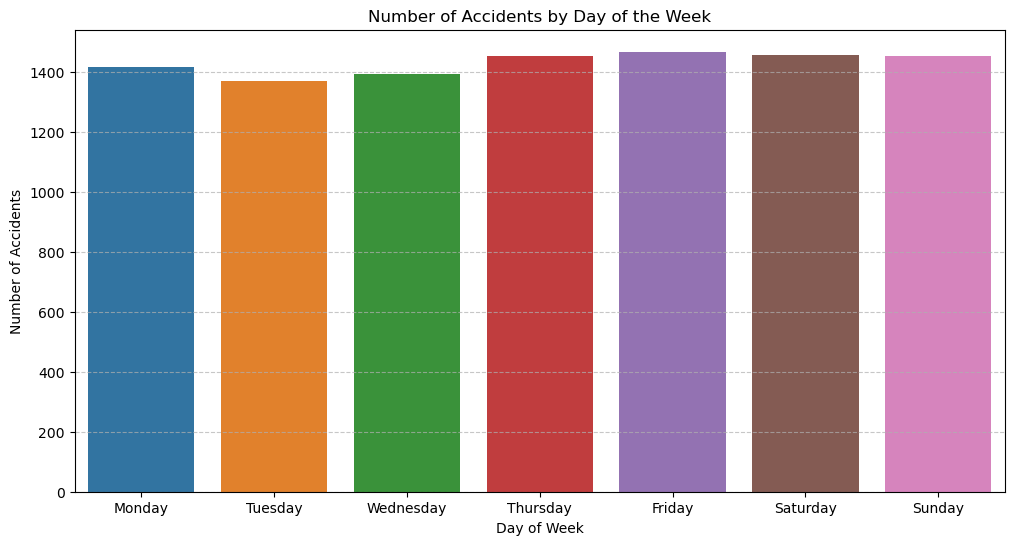

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

print("Creating synthetic US accidents dataset for demonstration...")

# Set sample size and date range
n_samples = 10000
np.random.seed(42)
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
date_range = (end_date - start_date).days

# Generate random start times and end times
random_days = np.random.randint(0, date_range, n_samples)
start_times = [start_date + timedelta(days=int(day),
                                      hours=int(np.random.randint(0, 24)),
                                      minutes=int(np.random.randint(0, 60)))
               for day in random_days]

end_times = [st + timedelta(hours=np.random.uniform(0.5, 4)) for st in start_times]

# Now you can use start_times and end_times

# Create synthetic dataset
np.random.seed(42)
n_samples = 10000

# Generate random dates within a 3-year period
start_date = datetime(2019, 1, 1)
end_date = datetime(2021, 12, 31)
date_range = (end_date - start_date).days

# Generate end times (0.5 to 4 hours after start time)
end_times = [st + timedelta(hours=np.random.uniform(0.5, 4)) for st in start_times]

# Generate locations (covering continental US)
lats = np.random.uniform(25, 49, n_samples)  # Continental US latitudes
lngs = np.random.uniform(-125, -65, n_samples)  # Continental US longitudes

# States
states = ['CA', 'TX', 'FL', 'NY', 'PA', 'IL', 'OH', 'GA', 'NC', 'MI', 
          'NJ', 'VA', 'WA', 'AZ', 'MA', 'TN', 'IN', 'MO', 'MD', 'WI']
state_weights = [0.15, 0.12, 0.10, 0.08, 0.07, 0.06, 0.05, 0.05, 0.04, 0.04,
                0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]
states_data = np.random.choice(states, n_samples, p=state_weights)

# Weather conditions
weather_conditions = ['Clear', 'Cloudy', 'Rain', 'Snow', 'Fog', 'Haze', 
                     'Thunderstorm', 'Windy', 'Drizzle', 'Freezing Rain']
weather_weights = [0.3, 0.25, 0.15, 0.1, 0.05, 0.05, 0.03, 0.03, 0.02, 0.02]
weather_data = np.random.choice(weather_conditions, n_samples, p=weather_weights)

# Sunrise/Sunset
sunrise_sunset = ['Day', 'Night']
sunrise_sunset_data = np.random.choice(sunrise_sunset, n_samples, p=[0.7, 0.3])

# Road features (True/False)
crossing_data = np.random.choice([True, False], n_samples, p=[0.3, 0.7])
junction_data = np.random.choice([True, False], n_samples, p=[0.4, 0.6])
stop_data = np.random.choice([True, False], n_samples, p=[0.2, 0.8])
traffic_signal_data = np.random.choice([True, False], n_samples, p=[0.35, 0.65])
roundabout_data = np.random.choice([True, False], n_samples, p=[0.05, 0.95])

# Weather measurements
temp_data = np.random.normal(65, 15, n_samples)  # Temperature in F
visibility_data = np.random.normal(9, 3, n_samples)  # Visibility in miles
visibility_data = np.clip(visibility_data, 0, 10)  # Clip to reasonable range
precip_data = np.random.exponential(0.1, n_samples)  # Precipitation in inches
precip_data = np.clip(precip_data, 0, 2)  # Clip to reasonable range

# Severity (1-4, with 4 being most severe)
# Make severity correlate with weather and time of day
severity_base = np.ones(n_samples, dtype=int)
# Increase severity for bad weather
for i, weather in enumerate(weather_data):
    if weather in ['Snow', 'Thunderstorm', 'Freezing Rain']:
        severity_base[i] += 1
    elif weather in ['Rain', 'Fog']:
        severity_base[i] += np.random.choice([0, 1], p=[0.5, 0.5])
# Increase severity for night
for i, time in enumerate(sunrise_sunset_data):
    if time == 'Night':
        severity_base[i] += np.random.choice([0, 1], p=[0.7, 0.3])
# Add some randomness
severity_data = np.clip(severity_base + np.random.choice([0, 1, 2], n_samples, p=[0.7, 0.2, 0.1]), 1, 4)

# Create the dataframe
df = pd.DataFrame({
    'ID': [f'A-{i}' for i in range(1, n_samples+1)],
    'Severity': severity_data,
    'Start_Time': start_times,
    'End_Time': end_times,
    'Start_Lat': lats,
    'Start_Lng': lngs,
    'State': states_data,
    'Weather_Condition': weather_data,
    'Sunrise_Sunset': sunrise_sunset_data,
    'Temperature(F)': temp_data,
    'Visibility(mi)': visibility_data,
    'Precipitation(in)': precip_data,
    'Crossing': crossing_data,
    'Junction': junction_data,
    'Stop': stop_data,
    'Traffic_Signal': traffic_signal_data,
    'Roundabout': roundabout_data
})

print(f"Synthetic dataset created with shape: {df.shape}")

# Extract time-related features
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Weekend'] = df['Weekday'].isin(['Saturday', 'Sunday']).astype(int)

# Calculate accident duration in minutes
df['Duration_Minutes'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60

print("\nDataset preview:")
display(df.head())

print("\nDataset summary statistics:")
display(df.describe())

# 1. ANALYSIS BY TIME PATTERNS
print("\n--- TIME PATTERN ANALYSIS ---")

#Accidents by hour of day
plt.figure(figsize=(12, 6))
hourly_accidents = df['Hour'].value_counts().sort_index()
sns.barplot(x=hourly_accidents.index, y=hourly_accidents.values)
plt.title('Number of Accidents by Hour of Day')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Accidents by day of week
plt.figure(figsize=(12, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['Weekday'].value_counts().reindex(order)
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
